In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("test_set_values.csv")


Saving test_set_values.csv to test_set_values.csv


**Data Dictionary:**

*	amount_tsh - Total static head (amount water available to waterpoint)
*	date_recorded - The date the row was entered
*	funder - Who funded the well
*	gps_height - Altitude of the well
*	installer - Organization that installed the well
*	longitude - GPS coordinate
*	latitude - GPS coordinate
*	wpt_name - Name of the waterpoint if there is one
*	num_private -
*	basin - Geographic water basin
*	subvillage - Geographic location
*	region - Geographic location
*	region_code - Geographic location (coded)
*	district_code - Geographic location (coded)
*	lga - Geographic location
*	ward - Geographic location
*	population - Population around the well
*	public_meeting - True/False
*	recorded_by - Group entering this row of data
*	scheme_management - Who operates the waterpoint
*	scheme_name - Who operates the waterpoint
*	permit - If the waterpoint is permitted
*	construction_year - Year the waterpoint was constructed
*	extraction_type - The kind of extraction the waterpoint uses
*	extraction_type_group - The kind of extraction the waterpoint uses
*	extraction_type_class - The kind of extraction the waterpoint uses
*	management - How the waterpoint is managed
*	management_group - How the waterpoint is managed
*	payment - What the water costs
*	payment_type - What the water costs
*	water_quality - The quality of the water
*	quality_group - The quality of the water
*	quantity - The quantity of water
*	quantity_group - The quantity of water
*	source - The source of the water
*	source_type - The source of the water
*	source_class - The source of the water
*	waterpoint_type - The kind of waterpoint
*	waterpoint_type_group - The kind of waterpoint



Phase one: Cleaning data

In [ ]:
# preview first five entries
data.head(n=5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
# preview last 5 entries
data.tail(n=5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
14849,68707,0.0,2013-02-13,Government Of Tanzania,481,Government,34.765054,-11.226012,Kwa Mzee Chagala,0,Lake Nyasa,Kamba,Ruvuma,10,3,Mbinga,Mbamba bay,40,True,GeoData Consultants Ltd,VWC,DANIDA,True,2008,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [ ]:
# overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [ ]:
data.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [ ]:
#################
# missing value 
#################
def check_missing_values(data):
    '''
        This function calculates missing values and percentages by column. 
        It can only identify NaN values and not hidden missing values.
    '''
    
    # calculate missing counts and percentage
    missing_data = pd.DataFrame({'missing_value_counts': data.isnull().sum(), 
                                 'percent_of_missing': (data.isnull().sum()/data.shape[0])*100})
    
    missing_data = missing_data[missing_data.missing_value_counts>0]
    missing_data.sort_values(by='missing_value_counts',ascending=False,inplace=True)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
           "There are " + str(missing_data.shape[0]) +" columns that have missing values.")
        
    # Return the dataframe with missing information
    return missing_data

In [ ]:
missing_data = check_missing_values(data)
missing_data

Your selected dataframe has 40 columns.
There are 7 columns that have missing values.


,missing_value_counts,percent_of_missing
scheme_name,7092,47.757576
scheme_management,969,6.525253
installer,877,5.905724
funder,869,5.851852
public_meeting,821,5.528620
permit,737,4.962963
subvillage,99,0.666667


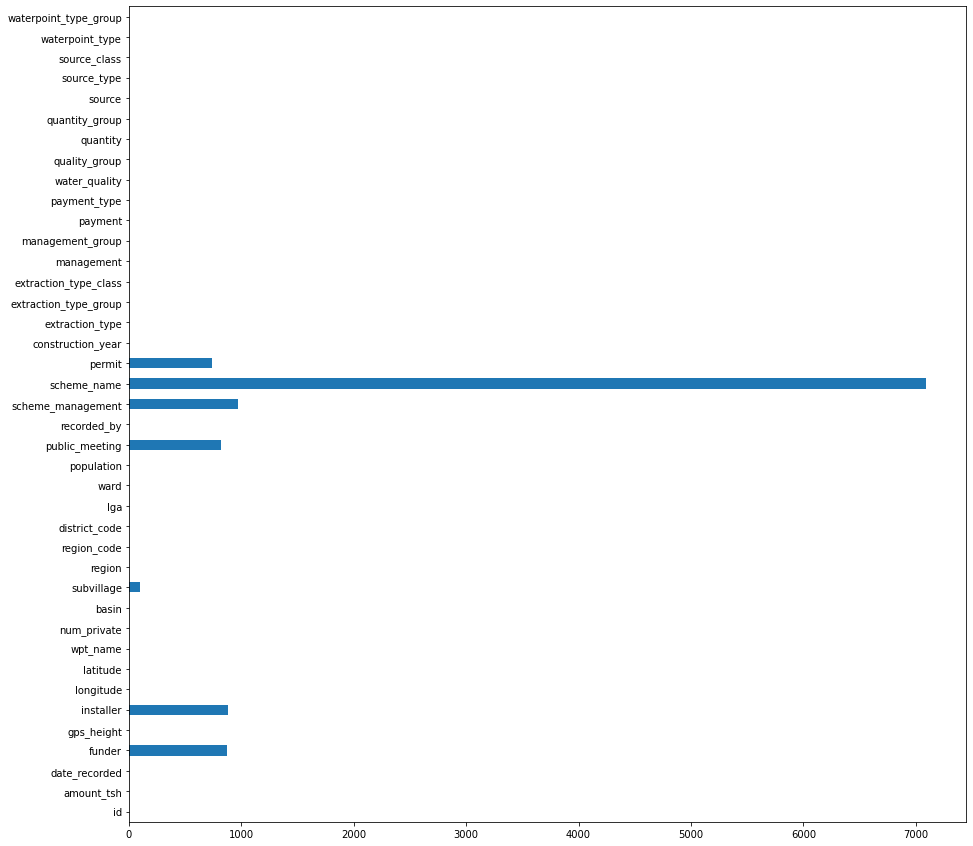

In [ ]:
# visualizing counts
plt.figure(figsize=(15, 15)) #Add this to your plots to adjust size 
vc_nulls = data.apply(lambda x: x.isnull().value_counts()).T[True]
vc_nulls.plot(kind = 'barh')

* funder: "who funded the well" - not significant if missing but important for good for business analysis
* installer: "organization that installed the well" - not significant if missing but important for good for business analysis
* subvillage: "Geographic location" - only 371 missing - check other region info is available for these
* public_meeting & permit: not sure about significance. Permit and public meeting features might not have any influence on the model itself 
* scheme_management: "who operates waterpoint" - replace missing values with unknown
* scheme_name: "who operates waterpoint" - check management but as per EDA we can drop this column

In [ ]:
data_values['status_group'].value_counts()

NameError: ignored

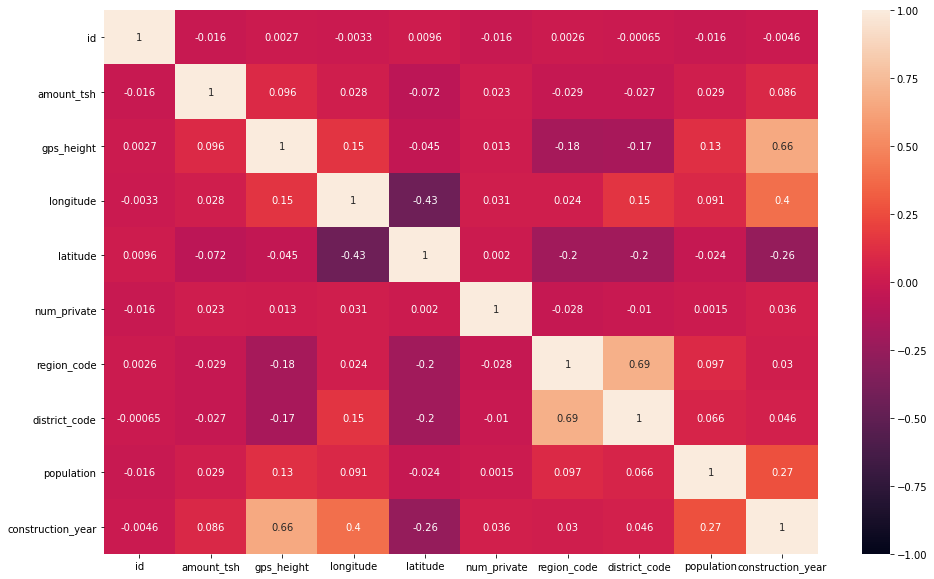

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

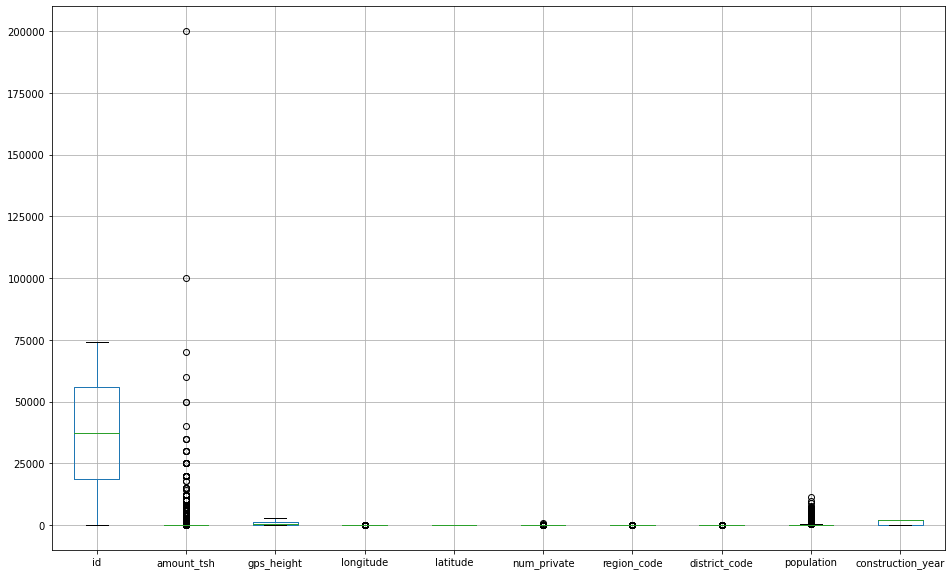

In [ ]:
# quick way to boxplot for numerical features
plt.figure(figsize=(16, 10))
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2268a035d0>,
      dtype=object)

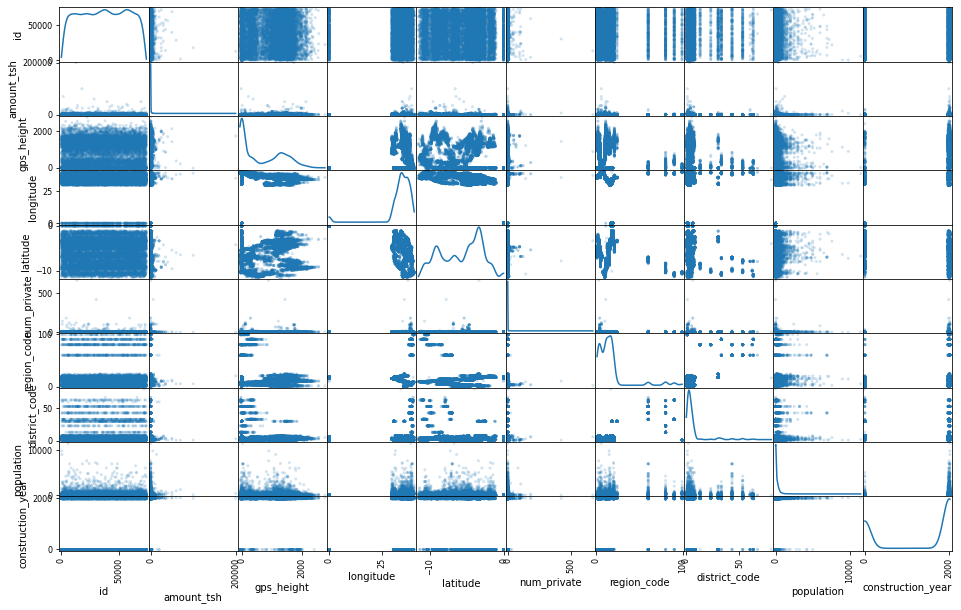

In [ ]:
# quick way to scatter plot for all numerical features
scatter_matrix(data, alpha=0.2, figsize=(16,10), diagonal="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2264df8050>,
      dtype=object)

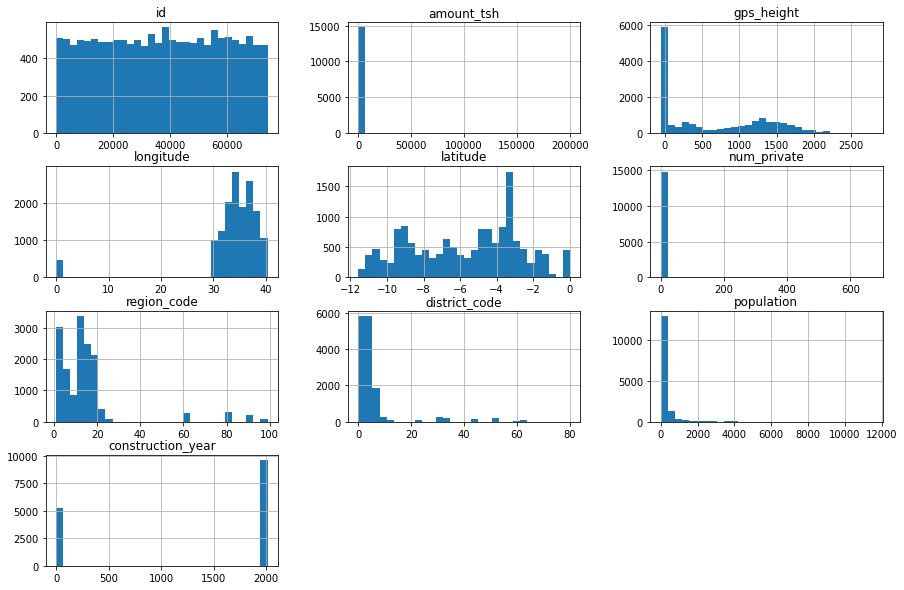

In [ ]:
# quick way to plot histograms for all numerical data
data.hist(bins=30, figsize=(15, 10))

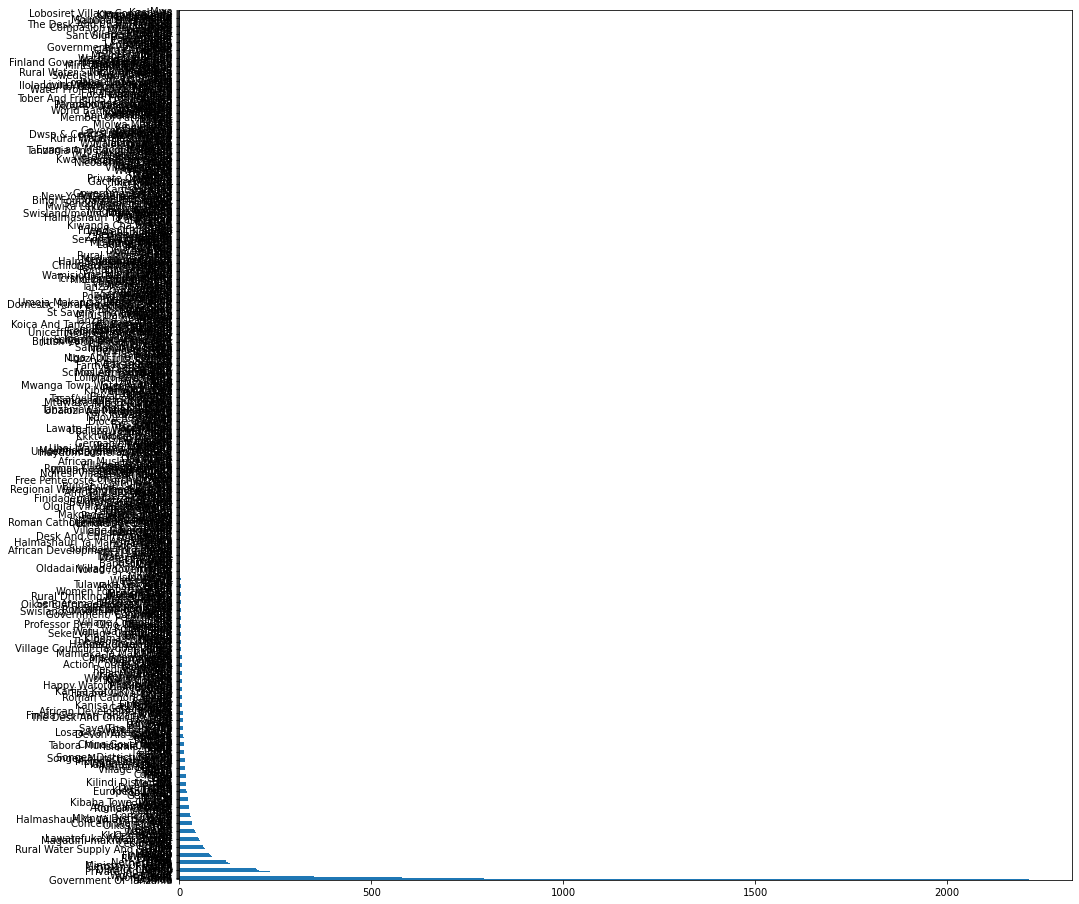

In [ ]:
# plot funder, waaaaaaaaay to many different categories, potentially
# needs some cleaning
plt.figure(figsize=(16, 16))
data['funder'].value_counts().plot(kind = 'barh')

In [ ]:
# value counts
data['funder'].value_counts()
len(data['funder'].unique().tolist())

981

In [ ]:
# changing float to string
data['funder'] = data['funder'].astype(str)

In [ ]:
# unique entries only
funder_unique = data['funder'].unique().tolist()

In [ ]:
# Sort by ascending order
sort_funder = sorted(funder_unique, key=str.lower)

In [ ]:
# viewing the values to see what's similar
sort_funder[1500:]

[]

Cleaning typos in funder features as an initial pass. This would have been so much easier if we had a reference list to clean. I just manually research the ones I changed.

In [ ]:
# changing Abas Ka, Abs to Abasia
data['funder'] = data['funder'].replace(['Abas Ka','Abs'],'Abasia')
# changing Acord to Acord Ngo
data['funder'] = data['funder'].replace(['Acord'],'Acord Ngo')
# changing Act to Act Mara
data['funder'] = data['funder'].replace(['Act'],'Act Mara')
# changing Action In A to Action Aid
data['funder'] = data['funder'].replace(['Action In A'],'Action Aid')
# changing Adp Mombo, Adp Bungu and Adp/w to Adp
data['funder'] = data['funder'].replace(['Adp Mombo', 'Adp Bungu', 'Adp/w'],'Adp')
data['funder'] = data['funder'].replace(['Afric','Africa','Africa 2000 Network/undp','African'],'African 2000 Network')
data['funder'] = data['funder'].replace(['African Realief Committe Of Ku','Afriican Relie', 'Afriican Reli'] , 'African Relief Committe of Kuwait')
data['funder'] = data['funder'].replace(['Africaone Ltd', 'Africare'], 'Africa one Ltd')
data['funder'] = data['funder'].replace(['Agape Churc'], 'Agape Church')
data['funder'] = data['funder'].replace(['Ai', 'Aic', 'Aic Church', 'Aic Kij', 'Aict'], 'AIC Church')

In [ ]:
data['funder'] = data['funder'].replace(['Boazi /o'], 'Boazi')
data['funder'] = data['funder'].replace(['Br', 'Bra', 'Brdp'], 'Brad')
data['funder'] = data['funder'].replace(['Bread For The Wor', 'Bread Of The Worl'], 'Bread For The World')
data['funder'] = data['funder'].replace(['Bukwang Church Saint', 'Bukwang Church Saints'], 'Bukwang Church')

In [ ]:
data['funder'] = data['funder'].replace(['Caltas'], 'Caltas Tanzania')
data['funder'] = data['funder'].replace(['Canada'], 'Canada Aid')
data['funder'] = data['funder'].replace(['Cdft','Cdtf','Cdtfdistrict Council'], 'Cdtf district Council')
data['funder'] = data['funder'].replace(['Cefa', 'Cefa-njombe', 'Cefa/rcchurch'], 'Cefa Church')
data['funder'] = data['funder'].replace(['Ces (gmbh)'], 'Ces(gmbh)')
data['funder'] = data['funder'].replace(['Christan Outrich'], 'Christian Outrich')
data['funder'] = data['funder'].replace(['Chuo', 'Churc', 'Church'], 'Church Of Disciples')
data['funder'] = data['funder'].replace(['Cip', 'Cipro', 'Cipro/care', 'Cipro/care/tcrs'], 'Cipro/government')
data['funder'] = data['funder'].replace(['Commu', 'Community'] , 'Community Bank')
data['funder'] = data['funder'].replace(['Conce', 'Concen', 'Concern', 'Concern /govern', 'Concern/governm'], 'Concern World Wide')
data['funder'] = data['funder'].replace(['Cpps'],'Cpps Mission')
                                         

In [ ]:
data['funder'] = data['funder'].replace(['Danida', 'Danida /government'], 'Danida goovernment')
data['funder'] = data['funder'].replace(['Dasp', 'Dasp Ltd', 'Dassip'], 'Dasip')
data['funder'] = data['funder'].replace(['Ded', 'Ded Kilo', 'Ded/rwssp','Ded_rwsp'], 'rwssp')
data['funder'] = data['funder'].replace(['Dgv', 'Dh', 'Dhinu', 'Dhv Moro', 'Dhv/gove', 'Dhv\\norp', 'Dhv\\swis'], 'Dhv')
data['funder'] = data['funder'].replace(['Dmd','Dmdd/solider'], 'Dmdd')
data['funder'] = data['funder'].replace(['Dmk'],'Dmk Anglican')
data['funder'] = data['funder'].replace(['Dom', 'Domestic Rural Development Pr'], 'Domestic Rural Development Pro')
data['funder'] = data['funder'].replace(['Drdp'], 'Drdp Ngo')
data['funder'] = data['funder'].replace(['Dwsdp', 'Dwssp', 'Dwst', 'Dwt'], 'Dwsp')


In [ ]:
data['funder'] = data['funder'].replace(['Eu'], 'Eu/acra')
data['funder'] = data['funder'].replace(['Eung Am Methodist Church'] ,'Eung-am Methodist Church')


In [ ]:
data['funder'] = data['funder'].replace(['Farm-africa'], 'Farm Africa')
data['funder'] = data['funder'].replace(['Fin Water''Finn Water','Finw','Fiwater','Fini Water'],'Finwater')
data['funder'] = data['funder'].replace(['Finidagermantanzania Govt'], 'Finida German Tanzania Govt')


In [ ]:
data['funder'] = data['funder'].replace(['Germany Misionary','German Missionary'],'Germany Missionary')
data['funder'] = data['funder'].replace(['Hasnan Murig (mbunge)', 'Hasnein Muij Mbunge'], 'Hasnein Murij')


In [ ]:
data['funder'] = data['funder'].replace(['Ilo/undp'], 'Ilo')
data['funder'] = data['funder'].replace(['Insititutiona','Institution','Insututional'], 'Institutional')
data['funder'] = data['funder'].replace(['Irevea Sister'],'Irevea Sister Water')

In [ ]:
data['funder'] = data['funder'].replace(['Juma','Jumaa','Jumanne'],'Jumanne Siabo')
data['funder'] = data['funder'].replace(['Kalitasi'],'Kalitesi')

In [ ]:
data['funder'] = data['funder'].replace(['Kigoma Municipal'], 'Kigoma Municipal Council')
data['funder'] = data['funder'].replace(['Kijij'],'Kijiji')

In [ ]:
data['funder'] = data['funder'].replace(['Lgcbg','Lgcdg','Lgcgd','Lgdbg','Lgdcg'], 'Lgcd')
data['funder'] = data['funder'].replace(['Lion Clu', 'Lions', 'Lions C', 'Lions Club'] ,'Lions Club Kilimanjaro')
data['funder'] = data['funder'].replace(['Lotary Club','Lotary International','Lottery'] , 'Lottery Club')
data['funder'] = data['funder'].replace(['Lutheran'] ,'Lutheran Church')

In [ ]:
data['funder'] = data['funder'].replace(['Member O', 'Member Of Parliament'], 'Member Of Perliament Ahmed Ali')
data['funder'] = data['funder'].replace(['Mfuko Wa Jimbo'] ,'Mfuko Wa Jimbo La Magu')
data['funder'] = data['funder'].replace(['Mfuko Wa Jimbo'] ,'Mfuko Wa Jimbo La Magu')
data['funder'] = data['funder'].replace(['Missi', 'Missio', 'Mission', 'Missionaries'] ,'Missionary')
data['funder'] = data['funder'].replace(['Mkinga  Distric Cou', 'Mkinga Distric Coun'], 'Mkinga District Council')
data['funder'] = data['funder'].replace(['Magadini-makiwaru Water'],'Magadini Makiwaru Water')
data['funder'] = data['funder'].replace(['Makona', 'Makondakonde Water Population', 'Makonde', 'Makonde Water Population', 'Makonder'] , 'Makonde Water Supply')
data['funder'] = data['funder'].replace(['Mgaya'], 'Mgaya Masese')
data['funder'] = data['funder'].replace(['Morovian','Morrovian'], 'Morovian Church')
data['funder'] = data['funder'].replace(['Mosqure'], 'Mosque')
data['funder'] = data['funder'].replace(['Msigw'], 'Msigwa')
data['funder'] = data['funder'].replace(['Msiki','Msikiti','Msikitini','Mstiiti'], 'Msikiti Masji')

In [ ]:
data['funder'] = data['funder'].replace(['National Rural (wb)','National Rural And Hfa'], 'National Rural')
data['funder'] = data['funder'].replace(['Nerthlands', 'Nethalan', 'Nethe','Netherla','Netherlands'], 'Netherland')
data['funder'] = data['funder'].replace(['Ngo'],'Ngos')


In [ ]:
data['funder'] = data['funder'].replace(['Plan', 'Plan Int','Plan Internatio'],'Plan International')
data['funder'] = data['funder'].replace(['Priva', 'Private','Private Co', 'Private Individul', 'Private Person'] ,'Private Individual')
data['funder'] = data['funder'].replace(['Private Owned'] ,'Private Institutions')
data['funder'] = data['funder'].replace(['Quick', 'Quick Win', 'Quick Win Project /council','Quick Win/halmashauri','Quick Wings','Quick Wins',
                                         'Quick Wins Scheme','Quicklw','Quickwi','Quickwins',
                                         'Quik','Quwkwin','Qwckwin','Qwekwin','Qwick Win','Qwickwin','Qwiqwi'],'Quick Win Project')

In [ ]:
data['funder'] = data['funder'].replace(['Rc','Rc Cathoric','Rc Ch','Rc Churc','Rc Church/centr'],'Rc Church')
data['funder'] = data['funder'].replace(['Romam Catholic','Roman','Roman Ca','Roman Catholic','Roman Catholic Rulenge Diocese','Roman Cathoric',
                                         'Roman Cathoric -kilomeni','Roman Cathoric Church','Roman Cathoric Same','Roman Cathoric-same', 
                                         'Roman Church'] , 'Romam Catholic Church')
data['funder'] = data['funder'].replace(['Rotary','Rotary I','Rotaty Club','Rotery C','Rotte'],'Rotary Club')


In [ ]:
data['funder'] = data['funder'].replace(['Schoo', 'School', 'School Adm9nstrarion'], 'School Administration')
data['funder'] = data['funder'].replace(['Sda', 'Sdg','Sdp'], 'Sda Church')
data['funder'] = data['funder'].replace(['Solidarm','Soliderm'], 'Solidame')
data['funder'] = data['funder'].replace(['Sweden','Sweeden','Swidish','Swifti'], 'Swedish')


In [ ]:
data['funder'] = data['funder'].replace(['Tag', 'Tag Church Ub', "Tag Patmo's"], 'Tag Church')
data['funder'] = data['funder'].replace(['Tanz Egypt Technical Cooper','Tanz/egypt Technical  Co-op','Tanza'], 'Tanz Egypt Technical  Co-op')
data['funder'] = data['funder'].replace(['Tasa','Tasad','Tasae','Tasaf 1','Tasaf And Lga','Tasaf And Mmem','Tasaf Ii','Tasaf/dmdd',
                                         'Tasaf/tlc','Tasafu','Tasef','Tasf','Tassaf'], 'Tasaf')

In [ ]:
data['funder'] = data['funder'].replace(['Unice','Unice/ Cspd','Unicef/ Csp','Unicef/african Muslim Agency','Unicef/central',
                                         'Unicef/cspd','Uniceg','Unicet','Unicrf','Uniseg'],'Unicef')

In [ ]:
data['funder'] = data['funder'].replace(['Villa', 'Villaers', 'Village', 'Village Communi'],'Village Community')
data['funder'] = data['funder'].replace(['W.D &', 'W.D & I.'],'W.D.&.I.')
data['funder'] = data['funder'].replace(['World Bank/government'], 'World Bank')
data['funder'] = data['funder'].replace(['World Vision/ Kkkt', 'World Vision/adra', 'World Vision/rc Church','Worldvision'] , 'World Vision')
data['funder'] = data['funder'].replace(['Zao','Zao Water Spring X'],'Zao Water Spring')

In [ ]:
# replace zeros and '-' with unknown
data['funder'] = data['funder'].replace(["0"], "unknown")
print(data["funder"].value_counts())
data['installer'] = data["installer"].replace(["0", "-"], "unknown")
print(data["installer"].value_counts())
#replacing blanks in the 'public_meeting' column with Unknown
data["public_meeting"].fillna("unknown", inplace=True)
print(data["public_meeting"].value_counts())
#replacing blanks in 'permit' with Unknown
data['permit'].fillna("unknown", inplace=True)
print(data['permit'].value_counts())
#replacing blanks in 'scheme_management' with Unknown
data['scheme_management'].fillna("Unknown", inplace=True)
print(data['scheme_management'].value_counts())

Government Of Tanzania    2215
nan                        869
Danida goovernment         795
Hesawa                     580
World Bank                 353
                          ... 
Maendeleo Ya Maji            1
Nado                         1
Poland Sec School            1
Kashwas                      1
Mws                          1
Name: funder, Length: 891, dtype: int64
DWE                              4349
Government                        457
RWE                               292
Commu                             287
DANIDA                            255
                                 ... 
SAXON BUILDING CONTRACTOR           1
Totaland care                       1
VCW                                 1
Pangaboi Health Centre              1
Africa Muslum Agence Tanzania       1
Name: installer, Length: 1091, dtype: int64
True       12738
False       1291
unknown      821
Name: public_meeting, dtype: int64
True       9754
False      4359
unknown     737
Name: permit, dtype: in

In [ ]:
len(data['funder'].unique().tolist())

891

In [ ]:
# checking if there is anything in common with the unknowns in funder
# installer. Looks like it was not recorded for almost the same period
# and same region
unknown = ['unknown']
data_fp = data[data['funder'].isin(unknown)]
print(data_fp['region'].unique().tolist())
print(data_fp['date_recorded'].unique().tolist())

data_ip = data[data['installer'].isin(unknown)]
print(data_ip['region'].unique().tolist())
print(data_ip['date_recorded'].unique().tolist())

['Dar es Salaam']
['2013-03-12', '2013-03-15', '2013-03-23', '2013-03-14', '2013-03-16', '2013-03-21', '2013-03-24', '2013-03-22', '2013-03-19', '2013-03-13', '2013-03-18', '2013-03-20', '2013-03-17', '2013-03-25', '2013-03-27', '2011-03-03', '2011-02-03', '2013-03-26']
['Dar es Salaam']
['2013-03-12', '2013-03-15', '2013-03-23', '2013-03-14', '2013-03-16', '2013-03-21', '2013-03-24', '2013-03-22', '2013-03-19', '2013-03-13', '2013-03-18', '2013-03-20', '2013-03-17', '2013-03-25', '2013-03-27', '2011-03-03', '2011-02-03', '2013-03-26']


In [ ]:
# checking if mangement_group is a sub-group of management by checking commercial entries
data.loc[data['management_group']=='commercial']['management'].value_counts() 

private operator    533
water authority     219
company             174
trust                27
Name: management, dtype: int64

In [ ]:
# let's confirm this using group-by
data.groupby(['management_group','management']).count() 

id  ...  waterpoint_type_group
management_group management               ...                       
commercial       company             174  ...                    174
                 private operator    533  ...                    533
                 trust                27  ...                     27
                 water authority     219  ...                    219
other            other               239  ...                    239
                 other - school       27  ...                     27
parastatal       parastatal          461  ...                    461
unknown          unknown             122  ...                    122
user-group       vwc               10117  ...                  10117
                 water board         755  ...                    755
                 wua                 583  ...                    583
                 wug                1593  ...                   1593

[12 rows x 38 columns]

Since management and management group are highly correlated and management has more information than management, we'll drop management_group. Similarly this can be see for quantity and quantity_group so we'll drop quantity_group

In [ ]:
# checking source, source_type, source_class columns
print(data['source'].value_counts())
print(data['source_type'].value_counts())
print(data['source_class'].value_counts())
data.groupby(['source_class','source', 'source_type']).count()

shallow well            4316
spring                  4195
machine dbh             2747
river                   2352
rainwater harvesting     568
hand dtw                 234
lake                     185
dam                      184
other                     49
unknown                   20
Name: source, dtype: int64
shallow well            4316
spring                  4195
borehole                2981
river/lake              2537
rainwater harvesting     568
dam                      184
other                     69
Name: source_type, dtype: int64
groundwater    11492
surface         3289
unknown           69
Name: source_class, dtype: int64


id  ...  waterpoint_type_group
source_class source               source_type                 ...                       
groundwater  hand dtw             borehole               234  ...                    234
             machine dbh          borehole              2747  ...                   2747
             shallow well         shallow well          4316  ...                   4316
             spring               spring                4195  ...                   4195
surface      dam                  dam                    184  ...                    184
             lake                 river/lake             185  ...                    185
             rainwater harvesting rainwater harvesting   568  ...                    568
             river                river/lake            2352  ...                   2352
unknown      other                other                   49  ...                     49
             unknown              other                   20  ...                     20

[10 rows x 37 columns]

All three source features has similar information and are highly correlated to each other so we'll keep source feature

In [ ]:
# water_quality and quality_group columns
print(data['water_quality'].value_counts())
print(data['quality_group'].value_counts())

soft                  12687
salty                  1226
unknown                 469
milky                   201
coloured                133
salty abandoned          84
fluoride                 44
fluoride abandoned        6
Name: water_quality, dtype: int64
good        12687
salty        1310
unknown       469
milky         201
colored       133
fluoride       50
Name: quality_group, dtype: int64


Water quality contains more unique information so we'll keep it and drop quality group

In [ ]:
#extraction_type, extraction_type_group and extraction_type_class columns¶
print(data['extraction_type'].value_counts())
print(data['extraction_type_group'].value_counts())
print(data['extraction_type_class'].value_counts())

data.groupby(['extraction_type_class','extraction_type_group']).count()

gravity              6483
nira/tanira          2051
other                1672
submersible          1218
swn 80                918
mono                  763
india mark ii         629
afridev               438
ksb                   375
other - rope pump     121
other - swn 81         55
india mark iii         37
windmill               35
cemo                   18
other - play pump      16
walimi                 12
climax                  9
Name: extraction_type, dtype: int64
gravity            6483
nira/tanira        2051
other              1672
submersible        1593
swn 80              918
mono                763
india mark ii       629
afridev             438
rope pump           121
other handpump       83
india mark iii       37
wind-powered         35
other motorpump      27
Name: extraction_type_group, dtype: int64
gravity         6483
handpump        4156
other           1672
submersible     1593
motorpump        790
rope pump        121
wind-powered      35
Name: extraction_type

id  ...  waterpoint_type_group
extraction_type_class extraction_type_group        ...                       
gravity               gravity                6483  ...                   6483
handpump              afridev                 438  ...                    438
                      india mark ii           629  ...                    629
                      india mark iii           37  ...                     37
                      nira/tanira            2051  ...                   2051
                      other handpump           83  ...                     83
                      swn 80                  918  ...                    918
motorpump             mono                    763  ...                    763
                      other motorpump          27  ...                     27
other                 other                  1672  ...                   1672
rope pump             rope pump               121  ...                    121
submersible           submersible            1593  ...                   1593
wind-powered          wind-powered             35  ...                     35

[13 rows x 38 columns]

we'll keep extraction_type_group as it is well balanced and contains enough details similar to both extraction_type_class and extraction_type.

In [ ]:
# waterpoint_type and waterpoint_type_group¶
print(data['waterpoint_type'].value_counts())
print(data['waterpoint_type_group'].value_counts())


communal standpipe             7106
hand pump                      4396
other                          1630
communal standpipe multiple    1508
improved spring                 175
cattle trough                    34
dam                               1
Name: waterpoint_type, dtype: int64
communal standpipe    8614
hand pump             4396
other                 1630
improved spring        175
cattle trough           34
dam                      1
Name: waterpoint_type_group, dtype: int64


In [ ]:
# dropping recorded by, num_private, payment and quantity features
data = data.drop(['management_group', 'source_class', 'source_type', 'quantity_group' , 'extraction_type_group', 'extraction_type','waterpoint_type_group', 'recorded_by', 'num_private', 'payment', 'date_recorded', 
                            'wpt_name', 'scheme_name', 'region_code', 'subvillage'], axis=1)


KeyError: ignored

In [ ]:
region = data['region'].unique().tolist()
region

['Manyara',
 'Arusha',
 'Singida',
 'Lindi',
 'Ruvuma',
 'Iringa',
 'Mtwara',
 'Kilimanjaro',
 'Tabora',
 'Mwanza',
 'Pwani',
 'Tanga',
 'Shinyanga',
 'Dar es Salaam',
 'Kigoma',
 'Dodoma',
 'Morogoro',
 'Mbeya',
 'Kagera',
 'Mara',
 'Rukwa']

In [ ]:
# test a sample of address with region using Micheal's csv
micheal_data['address']

0        Mavanga, Ludewa, Njombe, Southern Highlands Zo...
1        Airtel Tower, T17, Arusha road, Ikoma, Robanda...
2        Nyumba ya Mungu, Simanjiro, Manyara, Northern ...
3        T42, Nanyumbu, Masasi, Mtwara, Coastal Zone, T...
4        T38, Nyaishozi, Karagwe, Kagera, Lake Zone, Ta...
                               ...                        
57583     Mroma, Hai, Kilimanjaro, Northern Zone, Tanzania
57584            Njombe, Southern Highlands Zone, Tanzania
57585    Matebete, Mbeya, Southern Highlands Zone, Tanz...
57586                       Dodoma, Central Zone, Tanzania
57587         Sinyaulime, Morogoro, Coastal Zone, Tanzania
Name: address, Length: 57588, dtype: object

In [ ]:
# checking against region
micheal_data['Check_region'] = micheal_data.apply(lambda x: x.region.lower() in x.address.lower(), axis=1)
print(micheal_data['Check_region'].value_counts())

True     50024
False     7564
Name: Check_region, dtype: int64


In [ ]:
# checking against lga
micheal_data['Check_lga'] = micheal_data.apply(lambda x: x.lga.lower() in x.address.lower(), axis=1)
print(micheal_data['Check_lga'].value_counts())

True     38186
False    19402
Name: Check_lga, dtype: int64


In [ ]:
# checking against ward
micheal_data['Check_ward'] = micheal_data.apply(lambda x: x.ward.lower() in x.address.lower(), axis=1)
print(micheal_data['Check_ward'].value_counts())

False    46155
True     11433
Name: Check_ward, dtype: int64


I was hoping to get less false values on those checks but it seems that the address are not capturing everything. The latitude and longitude used for interpolating the address might not be complete. I suggest we keep region, lga and ward for the first run and see again later.

In [ ]:
# checking construction year
data['construction_year'].value_counts()

0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1963      22
1960      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1966       2
1965       2
Name: construction_year, dtype: int64

In [ ]:
# checking mean and median of construction year without zeros to replace the missing values
data.loc[data['construction_year']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,district_code,population,construction_year
count,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000
mean,37089.356621,482.979510,991.467779,36.001278,-6.244305,5.955787,278.723879,1997.097914
std,21375.255819,3092.381037,620.347340,2.564988,2.759837,10.744481,552.242358,12.310565
min,10.000000,0.000000,-57.000000,29.612776,-11.564592,1.000000,0.000000,1960.000000
25%,18571.250000,0.000000,359.000000,34.674239,-8.681012,2.000000,25.000000,1988.000000
50%,37183.500000,0.000000,1149.000000,36.676860,-6.132503,3.000000,150.000000,2000.000000
75%,55735.750000,200.000000,1481.000000,37.851525,-3.674159,4.000000,320.000000,2008.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-1.106080,63.000000,11469.000000,2013.000000


In [ ]:
# changing the zeros in contruction year with the mean year
data['construction_year'].replace(to_replace= 0, value= 2000, inplace=True)
print(data['construction_year'].value_counts())

2000    5747
2010     669
2009     663
2008     630
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1979      53
1981      53
1977      45
1973      43
2013      33
1971      32
1963      22
1960      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1965       2
1966       2
Name: construction_year, dtype: int64


In [ ]:
# rebalance the data by grouping for every 10 years.we can keep both features 
# for modelling purpose and see what works best

data['10_yrs'] = data['construction_year']

# grouping by 10years 

data['10_yrs'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
data['10_yrs'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
data['10_yrs'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
data['10_yrs'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
data['10_yrs'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
data['10_yrs'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

data['10_yrs'].value_counts()

00s    9093
90s    1933
80s    1361
10s    1300
70s    1042
60s     121
Name: 10_yrs, dtype: int64

In [ ]:
# checking amount_tsh which is the total static head (amount of water available to waterpoint)
print(data['amount_tsh'].value_counts())
# Seems that there's lot at ground level. We might want to drop this in the future. will keep it for now

0.0         10410
500.0         772
50.0          631
1000.0        370
20.0          349
            ...  
200000.0        1
100000.0        1
70000.0         1
2550.0          1
7000.0          1
Name: amount_tsh, Length: 68, dtype: int64


In [ ]:
# lots of zeros. I'll change it to the mean population for now. happy to hear any other ideas.
data_pop = data[data['population'] == 0]
len(data_pop)

5453

In [ ]:
data.loc[data['population']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,district_code,population,construction_year
count,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000
mean,37114.932532,447.764255,957.686815,36.095878,-6.145897,6.304246,290.954134,1997.191338
std,21407.044653,3089.832261,614.671104,2.590755,2.732964,11.423768,563.265359,12.282133
min,10.000000,0.000000,-57.000000,29.612776,-11.564592,1.000000,1.000000,1960.000000
25%,18610.000000,0.000000,337.000000,34.714606,-8.313329,2.000000,40.000000,1988.000000
50%,37122.000000,0.000000,1125.000000,36.748375,-5.859215,3.000000,150.000000,2000.000000
75%,55805.000000,200.000000,1449.000000,37.971678,-3.613975,5.000000,350.000000,2008.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-1.106080,67.000000,11469.000000,2013.000000


In [ ]:
data['population'].replace(to_replace = 0 , value =281, inplace=True)
print(data['population'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         321
1         300
2         500
3         250
4          60
         ... 
14845      20
14846    2960
14847     200
14848     150
14849      40
Name: population, Length: 14850, dtype: int64>


In [ ]:
# add status_group column to test_set_values 
data['status_group'] = pd.Series(' ')
data_merged = data.loc[:'status_group']


 

In [ ]:
data_merged.to_excel("data_clean.xlsx", index=False)

In [ ]:
# Clustering analysis
# to apply DBSAN to regional data, funder, insataller
print(data_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 14850 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   basin                  14850 non-null  object 
 8   region                 14850 non-null  object 
 9   district_code          14850 non-null  int64  
 10  lga                    14850 non-null  object 
 11  ward                   14850 non-null  object 
 12  population             14850 non-null  int64  
 13  public_meeting         14850 non-null  object 
 14  scheme_management      14850 non-null  object 
 15  pe

In [ ]:
#################
# gps height, latitude, longitude
#################
## Latitude and longitude coordinates of Tanzania are: -6.776012, 39.178326
geos = ['gps_height','longitude','latitude','basin','region']

# Check frequency of most common values
for col in geos: 
    cs = data[col].value_counts(normalize=True, sort=True, ascending=False)
    for k in cs.keys()[0:5]:
        print( col, k, int(cs[k]*10000)/100. )
    print('')

gps_height 0 35.09
gps_height -19 0.12
gps_height 1294 0.12
gps_height 1343 0.12
gps_height 1283 0.11

longitude 0.0 3.07
longitude 37.30228071 0.01
longitude 32.92057868 0.01
longitude 37.26006945 0.01
longitude 39.08057272 0.01

latitude -2e-08 3.07
latitude -7.10591905 0.01
latitude -2.47456022 0.01
latitude -7.17066586 0.01
latitude -6.99004232 0.01

basin Lake Victoria 17.66
basin Pangani 14.83
basin Rufiji 13.54
basin Internal 12.5
basin Lake Tanganyika 10.9

region Shinyanga 8.82
region Iringa 8.78
region Mbeya 7.53
region Kilimanjaro 7.5
region Morogoro 6.94



In [ ]:
# imputation and create binary flag indicating whether gps_height is 0
# For longitude, latitude, gps_height, we can estimate the null and zero values by taking their mean within each district_code or basin. T
# This technique should give us a more accurate estimate than merely taking the overall average.
bound_df = data_merged[(data_merged['latitude']<=-0.5)&
                 (data_merged['longitude']>=25)&
                 (data_merged['gps_height']>0)]

# check: enough data in each bucket 
print(bound_df.groupby(['basin'])['id'].count().min()) 
print('Bad quality geographic data: {}'.format(len(data_merged[~data_merged.id.isin(bound_df.id)])))

# calculate local mean
mean_geo_df = bound_df.groupby(['basin',])['latitude','longitude','gps_height'].mean()
assert(mean_geo_df.shape[0] == len(data['basin'].unique()))
mean_geo_df

265
Bad quality geographic data: 5596


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


,latitude,longitude,gps_height
basin,,,
Internal,-4.080397,35.493299,1487.838586
Lake Nyasa,-10.032028,34.763010,1506.611367
Lake Rukwa,-7.449798,31.519629,1391.426415
Lake Tanganyika,-4.856891,30.393150,1265.230596
Lake Victoria,-1.880651,33.994962,1324.567442
Pangani,-3.856791,37.564988,1103.844552
Rufiji,-8.481459,35.851583,1095.606304
Ruvuma / Southern Coast,-10.553743,38.102787,457.320119
Wami / Ruvu,-6.711753,38.177801,316.186854


In [ ]:
# new features  - add new binary columns indicating whether data quality is bad 
data_merged['gps_height_bad'] = (data_merged['gps_height']<=0)*1
data_merged.loc[data_merged['gps_height']<=0, 'gps_height'] = data_merged['basin'].apply(lambda x : mean_geo_df.at[x,'gps_height'])

data_merged['longitude_bad'] = (data_merged['longitude']<25)*1
data_merged.loc[data_merged['longitude']<25, 'longitude'] = data_merged['basin'].apply(lambda x : mean_geo_df.at[x,'longitude'])

data_merged['latitude_bad'] = (data_merged['latitude']>-0.5)*1
data_merged.loc[data_merged['latitude']>-0.5, 'latitude'] = data_merged['basin'].apply(lambda x : mean_geo_df.at[x,'latitude'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
for col in ['gps_height_bad','gps_height','latitude_bad','latitude','longitude_bad','longitude']: 
    cs = data_merged[col].value_counts(normalize=True, sort=True, ascending=False)
    for k in cs.keys()[0:5]:
        print( col, k, int(cs[k]*10000)/100. )
    print('')
    
# great! I only imputed bad quality geographic data without touching good coordinates

gps_height_bad 0 62.31
gps_height_bad 1 37.68

gps_height 1324.5674418604651 13.31
gps_height 1487.8385864374402 5.45
gps_height 1265.230596175478 4.92
gps_height 1506.6113671274961 4.01
gps_height 316.1868544600939 3.53

latitude_bad 0 96.92
latitude_bad 1 3.07

latitude -1.8806509648217054 2.9
latitude -4.8568913622159835 0.16
latitude -7.10591905 0.01
latitude -2.47456022 0.01
latitude -6.99004232 0.01

longitude_bad 0 96.92
longitude_bad 1 3.07

longitude 33.994962036294574 2.9
longitude 30.393149849516323 0.16
longitude 37.26006945 0.01
longitude 39.08057272 0.01
longitude 37.30228071 0.01



In [ ]:
categorical_feature_mask = data_merged.dtypes==object
categorical_cols = data_merged.columns[categorical_feature_mask].tolist()

In [ ]:
categorical_cols

['funder',
 'installer',
 'basin',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'waterpoint_type',
 '10_yrs',
 'status_group']

In [ ]:
# check for 'region', 'lga', 'ward' - Mayank
# waterpoint_type and extraction_type_class - Mayank
# basin and region - Dylan
# water_quality & quality_group - Dylan

In [ ]:
data_merged['region']

0        Manyara
1         Arusha
2        Singida
3          Lindi
4         Ruvuma
          ...   
14845      Pwani
14846      Tanga
14847    Singida
14848     Ruvuma
14849     Ruvuma
Name: region, Length: 14850, dtype: object

In [ ]:
# encode region column to do some clustering analysis with region_code
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical region
region = ['region']
scheme_management = ['scheme_management']
management = ['management']
waterpoint_type = ['waterpoint_type']
extraction_type_class = ['extraction_type_class']
source = ['source']
lga = ['lga']
ward = ['ward']
basin = ['basin']
quantity = ['quantity']
quality_group = ['quality_group']

data_merged['region_encoded'] = data_merged[region].apply(lambda col: le.fit_transform(col))
print(data_merged['region_encoded'].head(10))

data_merged['scheme_management_encoded'] = data_merged[scheme_management].apply(lambda col: le.fit_transform(col))
print(data_merged['scheme_management_encoded'].head(10))

data_merged['management_encoded'] = data_merged[management].apply(lambda col: le.fit_transform(col))
print(data_merged['management_encoded'].head(10))

data_merged['waterpoint_type_encoded'] = data_merged[waterpoint_type].apply(lambda col: le.fit_transform(col))
print(data_merged['waterpoint_type_encoded'].head(10))

data_merged['extraction_type_class_encoded'] = data_merged[extraction_type_class].apply(lambda col: le.fit_transform(col))
print(data_merged['extraction_type_class_encoded'].head(10))

data_merged['lga_encoded'] = data_merged[lga].apply(lambda col: le.fit_transform(col))
print(data_merged['lga_encoded'].head(10))

data_merged['ward_encoded'] = data_merged[ward].apply(lambda col: le.fit_transform(col))
print(data_merged['ward_encoded'].head(10))

data_merged['source_encoded'] = data_merged[source].apply(lambda col: le.fit_transform(col))
print(data_merged['source_encoded'].head(10))

data_merged['basin_encoded'] = data_merged[basin].apply(lambda col: le.fit_transform(col))
print(data_merged['basin_encoded'].head(10))

data_merged['quantity_encoded'] = data_merged[quantity].apply(lambda col: le.fit_transform(col))
print(data_merged['quantity_encoded'].head(10))

data_merged['quality_group_encoded'] = data_merged[quality_group].apply(lambda col: le.fit_transform(col))
print(data_merged['quality_group_encoded'].head(10))

0     8
1     0
2    18
3     7
4    16
5     0
6     3
7    12
8    12
9     6
Name: region_encoded, dtype: int64
0     2
1     7
2     7
3     7
4    10
5     7
6     7
7    10
8     7
9    10
Name: scheme_management_encoded, dtype: int64
0    3
1    7
2    7
3    7
4    9
5    7
6    7
7    7
8    7
9    9
Name: management_encoded, dtype: int64
0    6
1    1
2    6
3    6
4    1
5    1
6    4
7    2
8    1
9    1
Name: waterpoint_type_encoded, dtype: int64
0    3
1    0
2    3
3    3
4    0
5    0
6    1
7    5
8    0
9    0
Name: extraction_type_class_encoded, dtype: int64
0     63
1      0
2    109
3     49
4     61
5      0
6     34
7    116
8     88
9    106
Name: lga_encoded, dtype: int64
0      17
1     650
2    1677
3    1192
4    1075
5     346
6     931
7    1048
8    1217
9    1777
Name: ward_encoded, dtype: int64
0    5
1    8
2    5
3    7
4    8
5    8
6    3
7    3
8    8
9    8
Name: source_encoded, dtype: int64
0    0
1    5
2    0
3    7
4    7
5    5
6    6
7    7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
X = data_merged.copy()
X = data_merged[['region_encoded', 'district_code']]

In [ ]:
X1 = data_merged.copy()
X1 = data_merged[['scheme_management_encoded', 'management_encoded']]

In [ ]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

0.9995158873856743


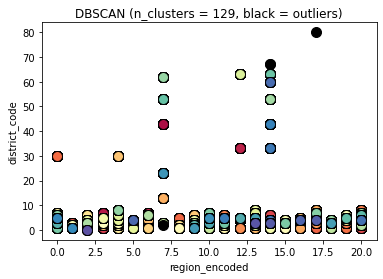

In [ ]:
print(silhouette_score(X, db.labels_))

plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('region_encoded');
plt.ylabel('district_code');

In [ ]:
data_merged['region_district'] = db.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
db.fit(X1)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

0.9971319550559771


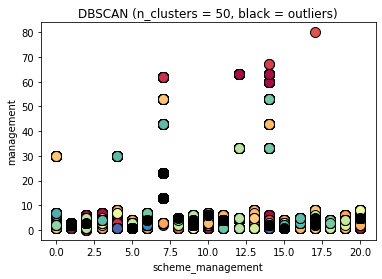

In [ ]:
print(silhouette_score(X1, db.labels_))

plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('scheme_management');
plt.ylabel('management');

In [ ]:
data_merged['schemeM_scheme'] = db.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X2 = data_merged.copy()
X2 = data_merged[['waterpoint_type_encoded', 'extraction_type_class_encoded']]

In [ ]:
db.fit(X2)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

0.9994257348417012


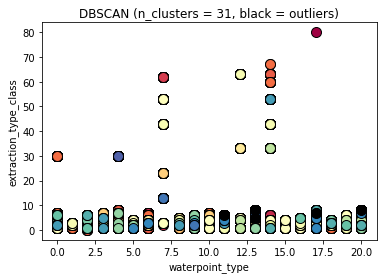

In [ ]:
print(silhouette_score(X2, db.labels_))

plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('waterpoint_type');
plt.ylabel('extraction_type_class');

In [ ]:
data_merged['waterpoint_extraction'] = db.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
M = data_merged.copy()
M = data_merged[['extraction_type_class_encoded', 'source_encoded']]

In [ ]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(M)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

0.9985427601592056


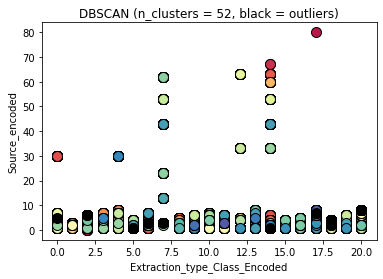

In [ ]:
print(silhouette_score(M, db.labels_))

plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Extraction_type_Class_Encoded');
plt.ylabel('Source_encoded');

In [ ]:
data_merged['extraction_source'] = db.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X9 = data_merged.copy()
X9 = data_merged[['basin_encoded', 'quality_group_encoded']]

In [ ]:
db.fit(X9)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

0.9991443150834459


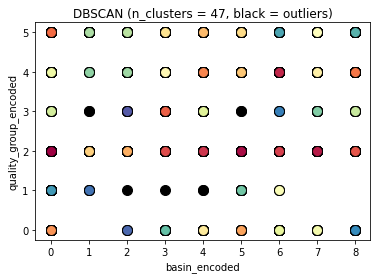

In [ ]:
print(silhouette_score(X9, db.labels_))

plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X9[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('basin_encoded');
plt.ylabel('quality_group_encoded');

In [ ]:
data_merged['basin_qualityG'] = db.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# breaking funder into smaller groups
data_merged['funder'] = data_merged['funder'].replace(['nan'], 'unknown')
data_merged['funder'].value_counts().head(25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Government Of Tanzania    2215
unknown                   1072
Danida goovernment         795
Hesawa                     580
World Bank                 353
Kkkt                       336
Rwssp                      329
World Vision               325
Dhv                        302
Unicef                     298
Private Individual         295
Tasaf                      284
Dwsp                       216
District Council           194
Norad                      184
Rc Church                  182
Netherland                 165
Water                      156
Germany Republi            155
Finwater                   153
Ministry Of Water          138
Tcrs                       133
Hifab                      127
Dwe                        121
Romam Catholic Church      109
Name: funder, dtype: int64

In [ ]:
top_funder = ['Government Of Tanzania', 'unknown', 'Danida goovernment', 'Hesawa', 'Rwssp',                     
              'World Bank', 'Kkkt', 'World Vision', 'Unicef', 'Private Individual', 'Dhv',                       
              'Tasaf', 'Dwsp', 'District Council', 'Norad', 'Rc Church', 'Netherland',
              'Finwater', 'Germany Republi', 'Tcrs', 'Ministry Of Water', 'Water', 'Dwe', 
              'Romam Catholic Church', 'Hifab']
data_merged['funder_cat'] = data_merged['funder'] 
data_merged.loc[~data_merged["funder_cat"].isin(top_funder), "funder_cat"] = "Others"
data_merged['funder_cat'].nunique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


26

[Text(0, 0, 'Others'),
 Text(0, 0, 'Government Of Tanzania'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'Finwater'),
 Text(0, 0, 'Unicef'),
 Text(0, 0, 'Germany Republi'),
 Text(0, 0, 'World Vision'),
 Text(0, 0, 'World Bank'),
 Text(0, 0, 'Ministry Of Water'),
 Text(0, 0, 'Danida goovernment'),
 Text(0, 0, 'Dwe'),
 Text(0, 0, 'Tasaf'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Dwsp'),
 Text(0, 0, 'Private Individual'),
 Text(0, 0, 'Netherland'),
 Text(0, 0, 'Rc Church'),
 Text(0, 0, 'Hesawa'),
 Text(0, 0, 'Kkkt'),
 Text(0, 0, 'Norad'),
 Text(0, 0, 'Rwssp'),
 Text(0, 0, 'Romam Catholic Church'),
 Text(0, 0, 'Hifab'),
 Text(0, 0, 'Tcrs'),
 Text(0, 0, 'Dhv'),
 Text(0, 0, 'District Council')]

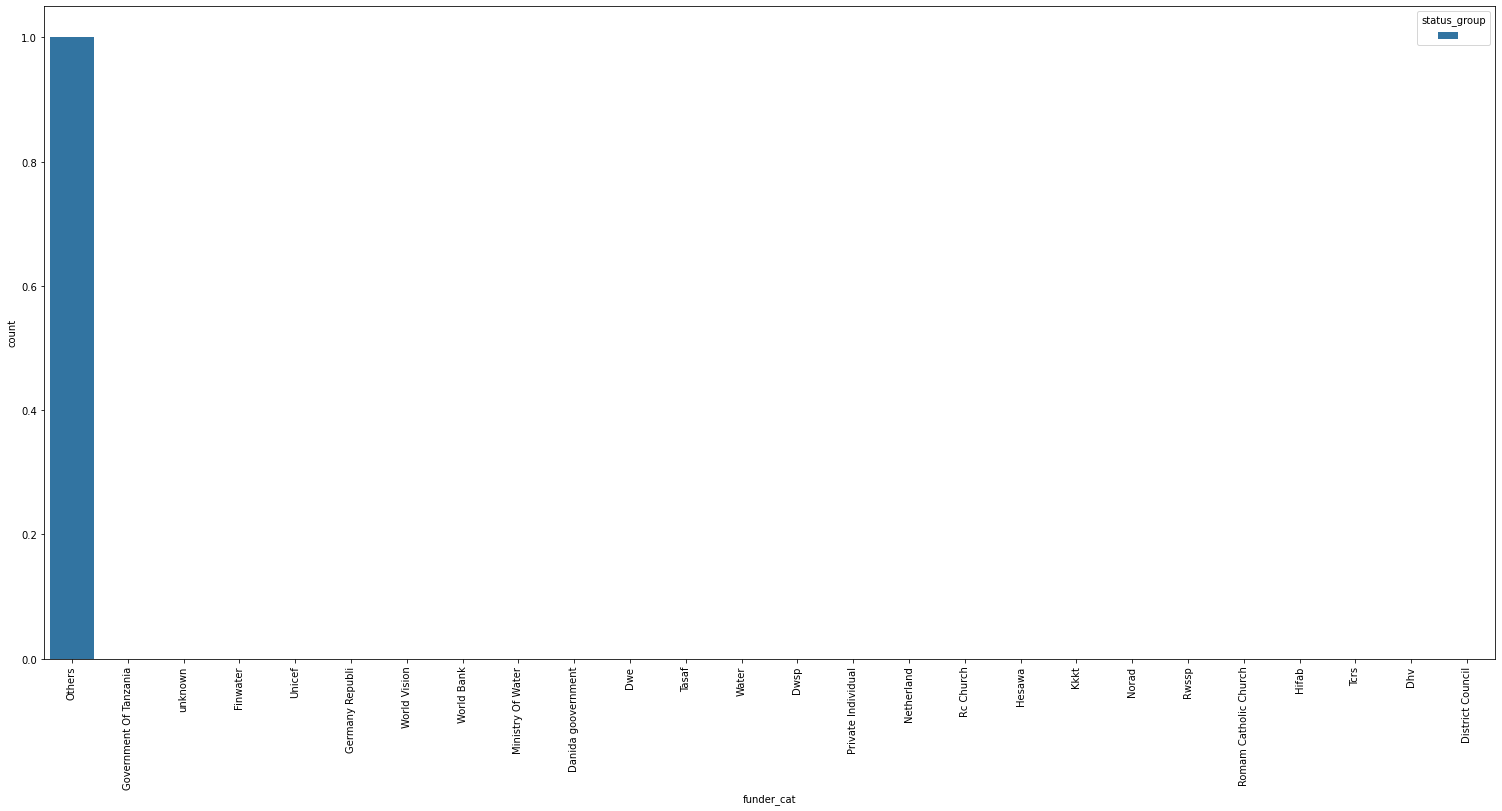

In [ ]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder_cat', hue="status_group", data=data_merged)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [ ]:
data_merged['installer'].value_counts()

DWE                              4349
Government                        457
RWE                               292
Commu                             287
DANIDA                            255
                                 ... 
SAXON BUILDING CONTRACTOR           1
Totaland care                       1
VCW                                 1
Pangaboi Health Centre              1
Africa Muslum Agence Tanzania       1
Name: installer, Length: 1091, dtype: int64

In [ ]:
data_merged['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

data_merged['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
data_merged['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

data_merged['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

data_merged['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

data_merged['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)
data_merged['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

data_merged['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
data_merged['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

data_merged['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

data_merged['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

data_merged['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

data_merged['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

data_merged['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
data_merged['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
data_merged['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
data_merged['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
data_merged['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
data_merged['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
data_merged['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
data_merged['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
data_merged['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
data_merged['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data_merged['installer'].value_counts().head(25)

DWE                   4349
Government             677
Community              438
DANIDA                 393
HESAWA                 370
RWE                    292
District council       270
Central government     245
KKKT                   222
unknown                203
TCRS                   180
world vision           165
CES                    155
Fini Water             139
RC Church              125
TASAF                  108
villagers              106
WEDECO                  99
LGA                     93
Unicef                  89
TWESA                   79
WU                      76
Dmdd                    69
AMREF                   69
ACRA                    68
Name: installer, dtype: int64

In [ ]:
top_installer = ['DWE','Government','Community','DANIDA','HESAWA',
                 'RWE','District council','Central government',
                 'KKKT','unknown','TCRS','world vision','CES','Fini Water',
                 'RC Church','villagers','LGA','WEDECO','TASAF','Unicef',
                 'AMREF','TWESA','WU','Dmdd','ACRA']
data_merged['installer_cat'] = data_merged['installer'] 
data_merged.loc[~data_merged["installer_cat"].isin(top_installer), "installer_cat"] = "Others"
data_merged['installer_cat'].nunique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


26

In [ ]:
data_merged['funder_cat'] = data_merged['funder_cat'].astype('category')
data_merged['installer_cat'] = data_merged['installer_cat'].astype('category')

data_merged['funder_cat'] = data_merged['funder_cat'].cat.codes
data_merged['installer_cat'] = data_merged['installer_cat'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X10 = data_merged.copy()
X10 = data_merged[['funder_cat', 'installer_cat']]

In [ ]:
db.fit(X10)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

0.9965523762200242


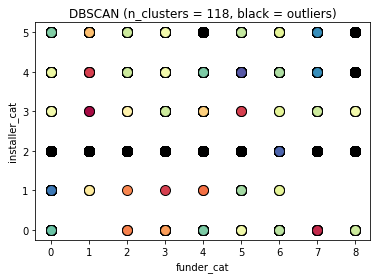

In [ ]:
print(silhouette_score(X10, db.labels_))

plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X9[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('funder_cat');
plt.ylabel('installer_cat');

In [ ]:
#binning population
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
labels = [1,2,3,4,5,6,7,8,9,10]
data_merged['population_binned'] = pd.cut(data_merged['population'], bins=bins, labels=labels)
print (data_merged['population_binned'])

0          2
1          2
2          3
3          2
4          1
        ... 
14845      1
14846    NaN
14847      1
14848      1
14849      1
Name: population_binned, Length: 14850, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#gps_height
data_merged['gps_height'].value_counts()/data_merged['gps_height'].count()

1324.567442    0.133199
1487.838586    0.054545
1265.230596    0.049226
1506.611367    0.040135
316.186854     0.035354
                 ...   
1814.000000    0.000067
1461.000000    0.000067
750.000000     0.000067
2142.000000    0.000067
2055.000000    0.000067
Name: gps_height, Length: 2113, dtype: float64

In [ ]:
#amount_tsh
print(data_merged.loc[data_merged['amount_tsh']==0].groupby('status_group').count())
print(data_merged['amount_tsh'].value_counts()/data_merged['amount_tsh'].count())
# I think we should drop it 70% has value zero that we cannot interprete correctly

# Applying Siyang's approach

# feature 1 - amount_tsh has 70% zero. I can create a flag
data_merged['amount_tsh_is_zero'] = np.where(data_merged['amount_tsh']==0,1,0)

# feature 2 - bin the amount_tsh
bins = (0,1,50,100,500,1000,5000,360000)
labels = [f'{int(i)}-{int(j)}' for i, j in zip(bins[:-1], bins[1:])] 
data_merged['amount_tsh_bin'] = pd.cut(data_merged.amount_tsh, bins=bins, labels=labels, right=False)

# audit - make sure binning interval makes sense
data_merged.amount_tsh_bin.value_counts(normalize=True)

              id  amount_tsh  ...  installer_cat  population_binned
status_group                  ...                                  
               1           1  ...              1                  1

[1 rows x 48 columns]
0.0         0.701010
500.0       0.051987
50.0        0.042492
1000.0      0.024916
20.0        0.023502
              ...   
200000.0    0.000067
100000.0    0.000067
70000.0     0.000067
2550.0      0.000067
7000.0      0.000067
Name: amount_tsh, Length: 68, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0-1            0.701145
1-50           0.067138
1000-5000      0.059529
100-500        0.056700
500-1000       0.056229
50-100         0.043232
5000-360000    0.016027
Name: amount_tsh_bin, dtype: float64

In [ ]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   id                             14850 non-null  int64   
 1   amount_tsh                     14850 non-null  float64 
 2   funder                         14850 non-null  object  
 3   gps_height                     14850 non-null  float64 
 4   installer                      13973 non-null  object  
 5   longitude                      14850 non-null  float64 
 6   latitude                       14850 non-null  float64 
 7   basin                          14850 non-null  object  
 8   region                         14850 non-null  object  
 9   district_code                  14850 non-null  int64   
 10  lga                            14850 non-null  object  
 11  ward                           14850 non-null  object  
 12  population                     1

In [ ]:
data_merged.to_csv("test_clean_completed.csv", index=False)

In [ ]:
from google.colab import files
files.download('test_clean_completed.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>